1. **Scikit-learn**: Kolay bir API'a sahip bir makine öğrenme kütüphanesi
2. **Pandas**: Veri analizi ve yapıları için kullanılan bir kütüphane (dataframe)  
3. **NumPy**: Bilimsel hesaplama kütüphanesi 
4. **Scikit-image**: Resim işleme kütüphanesi 
5. **matplotlib**: Grafik çizdirme kütüphanesi 
6. **Seaborn**: matplotlib temelli ama görselliği daha güçlü bir grafik kütüphanesi 

In [1]:
import numpy as np

# Alttaki satır sonuçların notebook dosyasında görünmesini sağlıyor.
%matplotlib inline
# Görselleştirme paketi
import matplotlib.pyplot as plt
plt.style.use('classic')

#Sınıflandırma veri seti oluşturmak için
from sklearn.datasets import make_classification

#Sınıflandırma algoritmaları
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

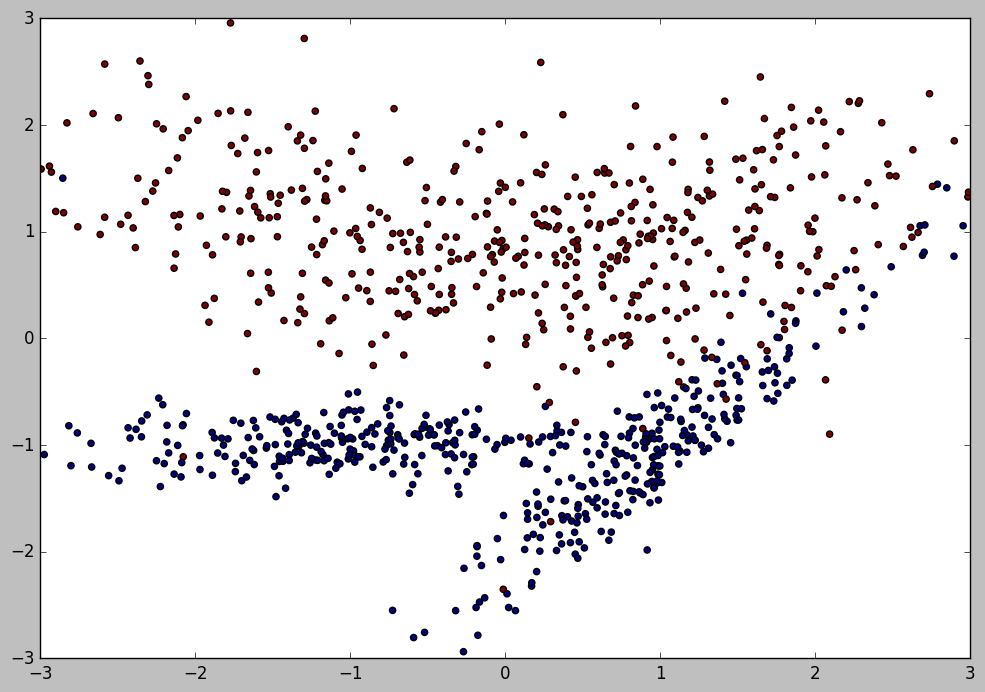

In [2]:
# 2 sınıf içeren yapay bir veri seti 
n_samples = 1000
X,y = make_classification(n_samples= n_samples, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=2, random_state=0)

# Veri setini görselleştirme
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.show()


Model oluşturmak için karar ağaçları!!!
Scikit-learn bir çok model için fit/predict ya da fit/transform şeklinde bir yapı 

Modeli isimlendirdikten sonra **fit(X,y)** şeklinde öğrenmesini , **predict(X)** yöntemiyle de X veri seti için sonuçları

In [3]:
# Karar ağaçları ve rastgele orman yöntemi
# Karar ağaçları
# Bir classifier oluştur ve modeli eğit
clf_dt = ................................


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

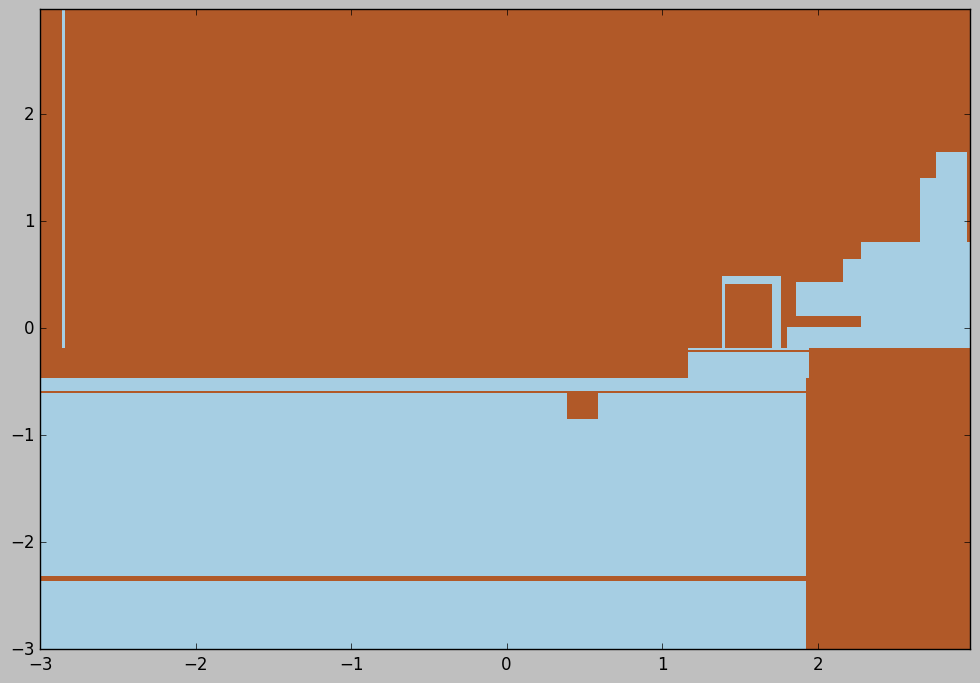

In [4]:
# Belirtilen bölgeden noktalar seç
h = .02
xx, yy = np.meshgrid(np.arange(-3,3, h), np.arange(-3,3, h))

# Eğitilen modelin yeni veri setini nasıl sınıflandırdığına bak
Z = clf_dt..............................(np.c_[xx.ravel(), yy.ravel()])

# Sonuçları çizdir
# imshow karar sınırlarını çizdirmemize yarayacak.
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.show()

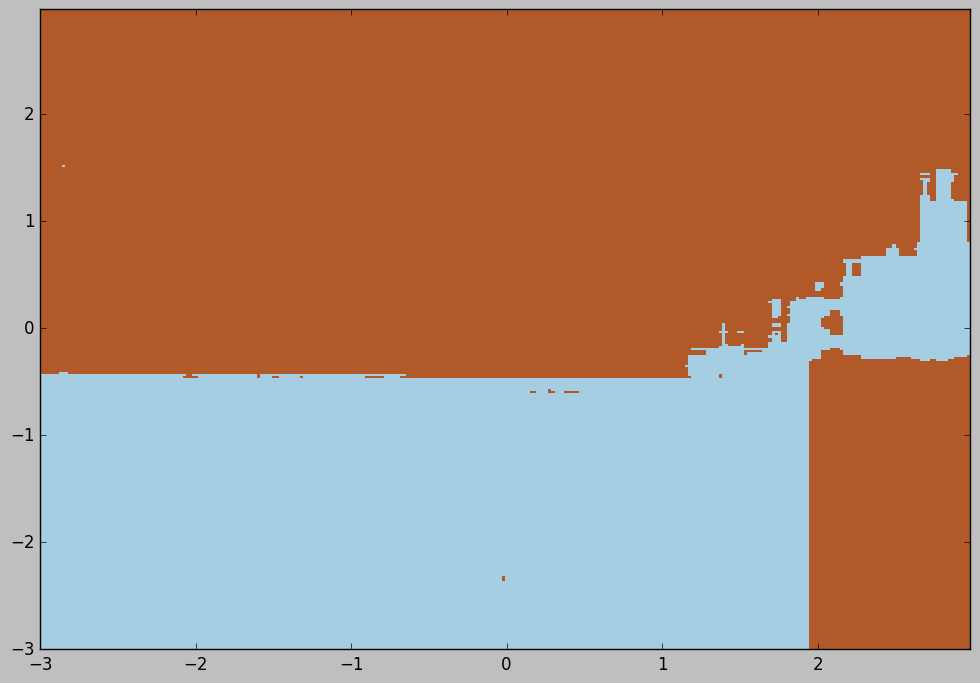

In [5]:
# Random Forest yöntemi 
# Model oluşturup eğit
clf_rf = .................................

Z = clf_rf...........................(np.c_[xx.ravel(), yy.ravel()])

# Çizdir
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.show()

## Tahmin

Modeli oluşturduktan sonra yeni gözlemlerin hangi sınıfa ait oldukları **predict** yöntemiyle belirlenebilir. 

Sıklıkla kullanılan bir diğer yöntem de gözlemlerin hangi sınıfa ait olduklarını olasılık kullanarak incelemektir.

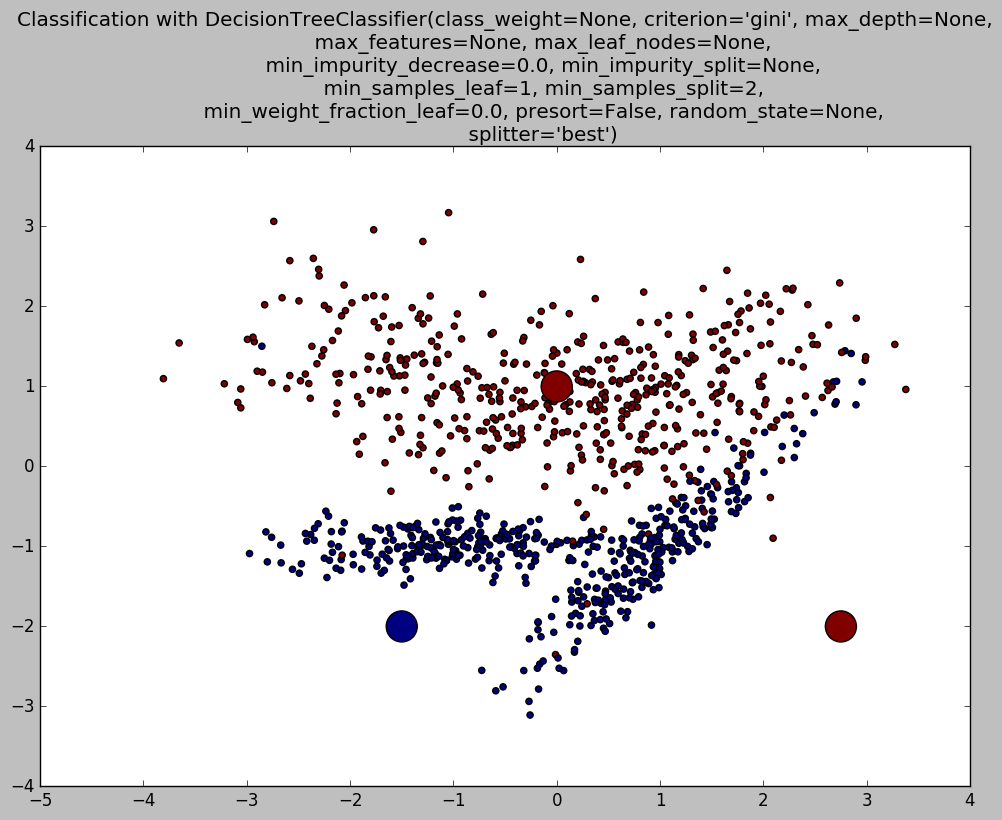

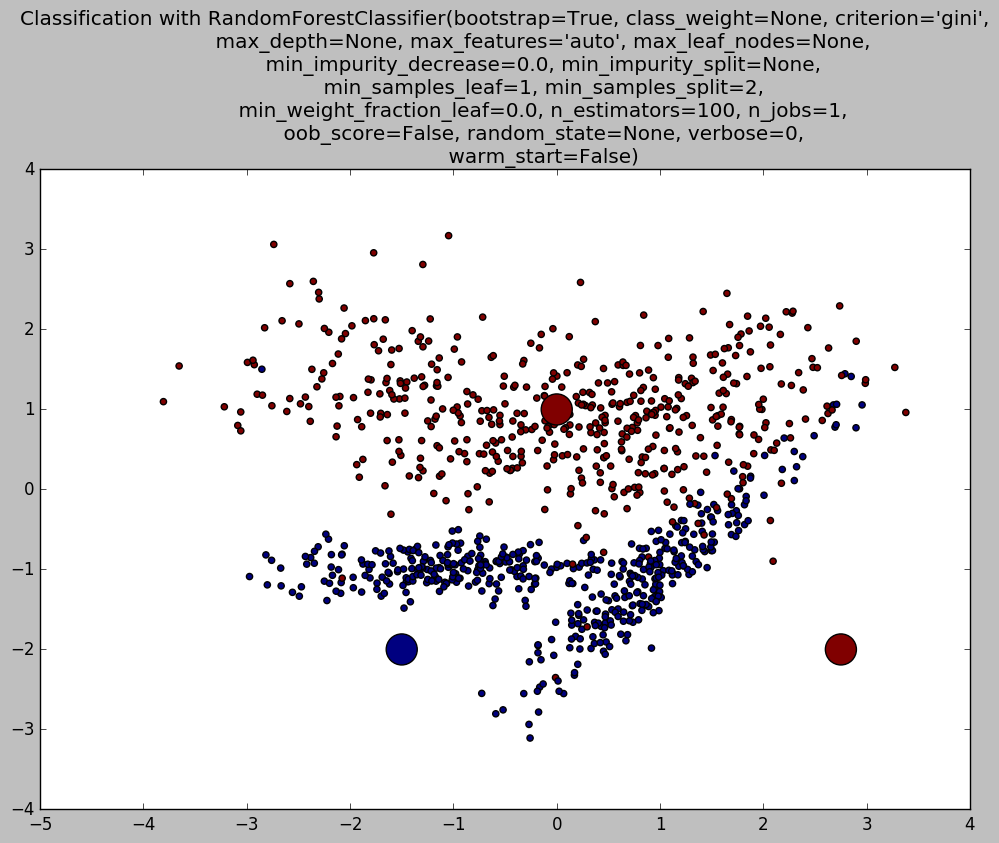

Decision Tree
Sample  0 probability of class 0 with probability 1.00, class 1 with probability 0.00
Sample  1 probability of class 0 with probability 0.00, class 1 with probability 1.00
Sample  2 probability of class 0 with probability 0.00, class 1 with probability 1.00
Random Forest
Sample  0 probability of class 0 with probability 0.99, class 1 with probability 0.01
Sample  1 probability of class 0 with probability 0.00, class 1 with probability 1.00
Sample  2 probability of class 0 with probability 0.44, class 1 with probability 0.56


In [6]:
# 3 yeni gözlem oluştur.
x_new = np.array([[-1.5,-2],[0,1],[2.75,-2]])

# İki model için sonuçları çizdir
for model in [...................................]:
    plt.figure(figsize=(12,8))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(x_new[:,0], x_new[:,1], c=model.predict(x_new), s=500)
    plt.title("Classification with %10s" % model)
    plt.show()

# Gözlemlerin sınıflara ait olma olasılıklarına bak
print('Decision Tree')
for i in range(len(x_new)):
    print('Sample %2i probability of class 0 with probability %4.2f, class 1 with probability %4.2f' % 
          (i,clf_dt.predict_proba(x_new[i,:].reshape(1,-1))[0][0],clf_dt.predict_proba(x_new[i,:].reshape(1,-1))[0][1]))

print('Random Forest')
for i in range(len(x_new)):
    print('Sample %2i probability of class 0 with probability %4.2f, class 1 with probability %4.2f' % 
          (i,clf_rf.predict_proba(x_new[i,:].reshape(1,-1))[0][0],clf_rf.predict_proba(x_new[i,:].reshape(1,-1))[0][1]))
   